<h1 class='font-effect-fire-animation' style='color:#37c9e1; font-family:Akronim;'> &#x1F310; &nbsp; Code Modules, Styling, Helpful Functions, and Links </h1>

[GitHub Repository](https://github.com/OlgaBelitskaya/deep_learning_projects/tree/master/DL_PP4)

In [1]:
library(IRdisplay); library(repr)
library(tensorflow); library(keras)
library(imager); library(R6)
keras_backend<-backend()

Loading required package: magrittr

Attaching package: ‘imager’

The following object is masked from ‘package:magrittr’:

    add

The following object is masked from ‘package:IRdisplay’:

    display

The following objects are masked from ‘package:stats’:

    convolve, spectrum

The following object is masked from ‘package:graphics’:

    frame

The following object is masked from ‘package:base’:

    save.image



In [2]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Akronim|Roboto&effect=3d|fire-animation');
body {background-color:gainsboro;} 
a,h4 {color:#37c9e1; font-family:Roboto;} 
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}       
</style>")

In [3]:
image_loading<-function(image_path) {
    image<-keras::image_load(image_path,target_size=c(150,150))
    image<-image_to_array(image)/255
    image<-array_reshape(image,c(1,dim(image)))
    return(image) }
image_grayscaled_loading<-function(image_path) {
    image<-keras::image_load(image_path, 
                             target_size=c(150,150),
                             grayscale=T)
    image<-image_to_array(image)/255
    image<-array_reshape(image,c(1,dim(image)))
    return(image)}

<h1 class='font-effect-fire-animation' style='color:#37c9e1; font-family:Akronim;'> &#x1F310; &nbsp; Data Loading and Exploration </h1>

In [4]:
data<-read.csv('../input/style/style.csv')
head(data)

brand_name,brand_label,product_name,product_label,file
Christian Louboutin,0,shoes,0,0_0_001.png
Christian Louboutin,0,shoes,0,0_0_002.png
Christian Louboutin,0,shoes,0,0_0_003.png
Christian Louboutin,0,shoes,0,0_0_004.png
Christian Louboutin,0,shoes,0,0_0_005.png
Christian Louboutin,0,shoes,0,0_0_006.png


[1] 150 150   1   4

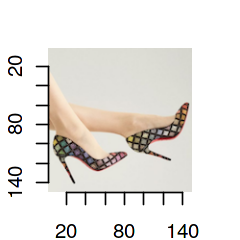

In [5]:
im<-load.image("../input/style/0_0_005.png")
options(repr.plot.width=2,repr.plot.height=2)
par(mar=c(2,2,2,2)); dim(im)
plot(im)

In [6]:
image_paths<-list.files("../input/style", 
                        recursive=TRUE,full.names=TRUE)
image_paths<-image_paths[1:(length(image_paths)-2)]
tail(image_paths)

[1] "../input/style/6_9_016.png" "../input/style/6_9_017.png"
[3] "../input/style/6_9_018.png" "../input/style/6_9_019.png"
[5] "../input/style/6_9_020.png" "../input/style/6_9_021.png"

In [7]:
c(unique(data['brand_name'])); c(unique(data['product_name']))

$brand_name
[1] Christian Louboutin Chanel              Dolce & Gabbana    
[4] Gucci               Christian Dior      Versace            
[7] Yves Saint Laurent 
7 Levels: Chanel Christian Dior Christian Louboutin Dolce & Gabbana ... Yves Saint Laurent

$product_name
 [1] shoes       lipstick    handbag     nail polish boots       necklace   
 [7] watches     ring        bracelet    earrings   
10 Levels: boots bracelet earrings handbag lipstick nail polish ... watches

<h1 class='font-effect-fire-animation' style='color:#37c9e1; font-family:Akronim;'> &#x1F310; &nbsp; Implementation of Preprocessing Functions </h1>

In [8]:
brands<-as.matrix(data["brand_label"])
products<-as.matrix(data["product_label"])
brand_targets<-keras::to_categorical(brands,7)
product_targets<-keras::to_categorical(products,10)
c(dim(brands),dim(products),
  dim(brand_targets),dim(product_targets))

[1] 2184    1 2184    1 2184    7 2184   10

In [9]:
images<-lapply(image_paths,image_loading)

In [10]:
images<-array_reshape(images,c(-1,150*150*3))
targets<-cbind(brand_targets,product_targets)
c(dim(images),dim(targets))

[1]  2184 67500  2184    17

In [11]:
df<-data.frame(images,brand_targets,
               product_targets,targets)
df<-df[sample(nrow(df)),]; dim(df)

[1]  2184 67534

[1] "Dimensions:" "150"         "150"         "3"           "  "         
 [6] "Brand: "     "1"           "  "          "Product: "   "2"

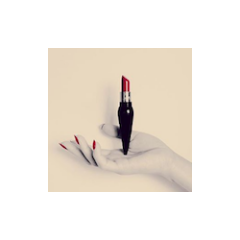

In [12]:
options(repr.plot.width=2,repr.plot.height=2)
par(mar=c(2,2,2,2))
image_example<-array_reshape(as.matrix(df[200,1:67500]),
                             c(150,150,3))
plot(as.raster(image_example))
c("Dimensions:",dim(image_example),"  ", 
  "Brand: ",which(df[200,67501:67507]==1),"  ",
  "Product: ",which(df[200,67508:67517]==1))

In [13]:
train_indices<-1:round(0.8*nrow(df))
valid_indices<-(round(0.8*nrow(df))+1):round(0.9*nrow(df))
test_indices<-(round(0.9*nrow(df))+1):nrow(df)

In [14]:
# color images
x_train1<-as.matrix(df[train_indices,1:67500])
x_valid1<-as.matrix(df[valid_indices,1:67500])
x_test1<-as.matrix(df[test_indices,1:67500])
# brand targets
y_train1<-as.matrix(df[train_indices,67501:67507])
y_valid1<-as.matrix(df[valid_indices,67501:67507])
y_test1<-as.matrix(df[test_indices,67501:67507])
# product targets
y_train2<-as.matrix(df[train_indices,67508:67517])
y_valid2<-as.matrix(df[valid_indices,67508:67517])
y_test2<-as.matrix(df[test_indices,67508:67517])
# multi-label targets
y_train3<-as.matrix(df[train_indices,67518:67534])
y_valid3<-as.matrix(df[valid_indices,67518:67534])
y_test3<-as.matrix(df[test_indices,67518:67534])

In [15]:
c(dim(x_train1),dim(x_valid1),dim(x_test1),
  dim(y_train3),dim(y_valid3),dim(y_test3))

[1]  1747 67500   219 67500   218 67500  1747    17   219    17   218    17

In [16]:
gray_images<-lapply(image_paths,image_grayscaled_loading)
gray_images<-array_reshape(gray_images,c(-1,150*150))

In [17]:
gray_df<-data.frame(gray_images,brand_targets,
                    product_targets,targets)
gray_df<-gray_df[sample(nrow(gray_df)),]; dim(gray_df)

[1]  2184 22534

[1] "Dimensions:" "150"         "150"         "  "          "Brand: "    
[6] "2"           "  "          "Product: "   "5"

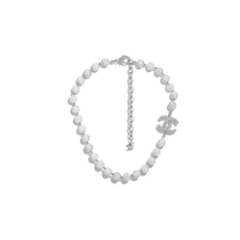

In [18]:
options(repr.plot.width=2,repr.plot.height=2)
par(mar=c(2,2,2,2))
image_example<-array_reshape(as.matrix(gray_df[500,1:22500]),c(150,150))
plot(as.raster(image_example))
c("Dimensions:", dim(image_example), "  ", 
  "Brand: ",which(gray_df[500,22501:22507]==1),"  ",
  "Product: ",which(gray_df[500,22508:22517]==1))

In [19]:
# gray_scaled images
x_train2<-as.matrix(gray_df[train_indices,1:22500])
x_valid2<-as.matrix(gray_df[valid_indices,1:22500])
x_test2<-as.matrix(gray_df[test_indices,1:22500])
# brand targets
y_train4 <- as.matrix(gray_df[train_indices,22501:22507])
y_valid4 <- as.matrix(gray_df[valid_indices,22501:22507])
y_test4 <- as.matrix(gray_df[test_indices,22501:22507])
# product targets
y_train5 <- as.matrix(gray_df[train_indices,22508:22517])
y_valid5 <- as.matrix(gray_df[valid_indices,22508:22517])
y_test5 <- as.matrix(gray_df[test_indices,22508:22517])
# multi-label targets
y_train6 <- as.matrix(gray_df[train_indices,22518:22534])
y_valid6 <- as.matrix(gray_df[valid_indices,22518:22534])
y_test6 <- as.matrix(gray_df[test_indices,22518:22534])

In [20]:
c(dim(x_train2),dim(x_valid2),dim(x_test2),
  dim(y_train6),dim(y_valid6),dim(y_test6))

[1]  1747 22500   219 22500   218 22500  1747    17   219    17   218    17